In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, poisson, binom, expon, geom, boxcox

In [2]:
# Reading the csv file as a pandas dataframe in 'df' object

df = pd.read_csv("Dataset.csv")

In [3]:
# Observing the data set

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
# No. of null values present in each column.

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
# There are no null values present in the data set

# Data exploration

In [7]:
# No. of unique customers present in the dataset

df["User_ID"].nunique()

5891

In [8]:
# No. of unique products present in the dataset

df["Product_ID"].nunique()

3631

In [9]:
# Age groups present in the dataset

df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
# Different categories of city present in the dataset

df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
# minimum and maximum no. of years in occupation, i.e. assuming the values are years in occupation.

df["Occupation"].agg([min, max])

min     0
max    20
Name: Occupation, dtype: int64

In [12]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
# Not sure what each of the no. signifies but for my undesrtanding:
#     0 -> single
#     1 -> married

df["Marital_Status"].unique()

array([0, 1])

In [14]:
# No. of unique product categories present

df["Product_Category"].nunique()

20

In [15]:
# Purchanse amount range by the customers

df["Purchase"].agg([min, max])

min       12
max    23961
Name: Purchase, dtype: int64

# Detecting ouliers

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [17]:
# After thorough obeservations, the only column with possible outliers are:
# 'Purchase' and  'Occupation' column.

### "Purchase" column

In [18]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [19]:
# 1st quratile

q1 = np.percentile(df["Purchase"], 25)
q1

5823.0

In [20]:
# 3rd quartile 

q3 = np.percentile(df["Purchase"], 75)
q3

12054.0

In [21]:
# Normal range : difference b/w max and min

normal_range = df["Purchase"].max() - df["Purchase"].min()
normal_range

23949

In [22]:
# Interquartile range (IQR)

iqr = q3 - q1
iqr

6231.0

In [23]:
# As can be seen, the IQR is far less then normal range
# Thus there are significant no. of outliers present.

# Let's have a visual on them.

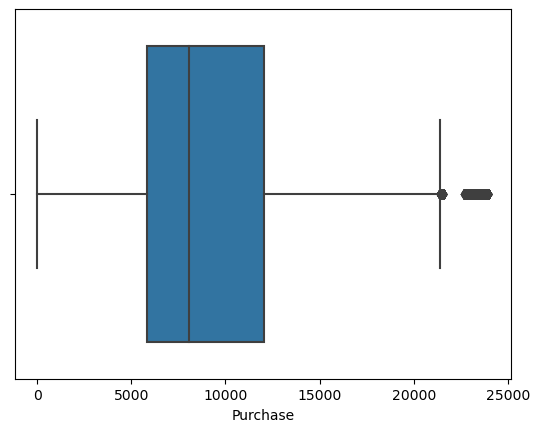

In [24]:
sns.boxplot(x = df["Purchase"])
plt.show()

In [25]:
# Since there can't be any negative value in the Purchase amount
# We can't have any ouliers less the lower whisker.
# The same is observed in the boxplot

# Thus, we have outliers only after upper whisker

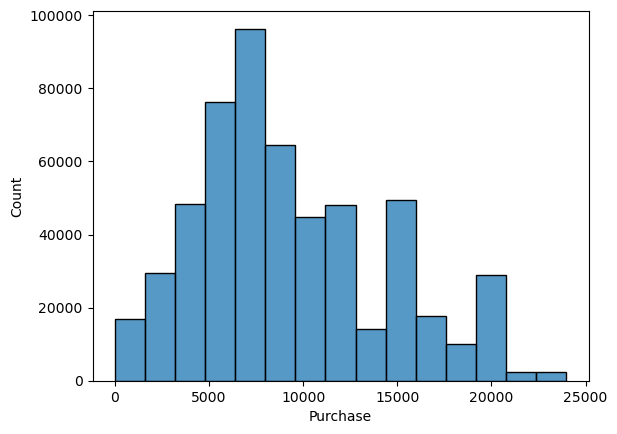

In [26]:
# Observing the data skewness using histogram plot

sns.histplot(df["Purchase"], bins=15)
plt.show()

In [27]:
df["Purchase"].skew()

0.6001400037087128

In [28]:
# From both histogram plot and skewness value, 
# it can be inferred that the 'Purchase' is moderately skewed to the right

# For moderately skewed data, we can proceed by cliping the data points...
# between 5th percentile and 95th percentile values.

# clipping the data will help us remove exptreme 10% values from both the ends included.
# thus reducing (if not removing) outliers.

In [29]:
# Calculating the 5th and 95th percentiles

lower = np.percentile(df['Purchase'], 5)
upper = np.percentile(df['Purchase'], 95)

# Cliping the values in the 'Purchase' column

df['Purchase'] = df['Purchase'].clip(lower, upper)

In [30]:
# Validating the changes by calculating the min and max values and comparing with lower and upper values.

lower, upper

(1984.0, 19336.0)

In [31]:
df["Purchase"].min(), df["Purchase"].max()

(1984, 19336)

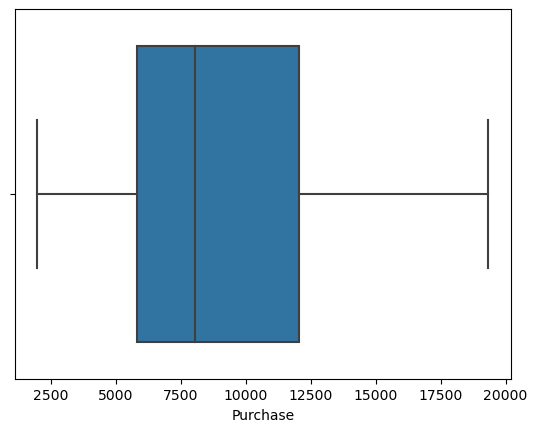

In [32]:
# Ploting boxplot for new datapoints in the 'Purchase' column to check for outliers

sns.boxplot(x=df["Purchase"])
plt.show()

In [33]:
# No more outliers in the Purchase column

In [34]:
df["Purchase"].describe()

count    550068.000000
mean       9256.710489
std        4855.947166
min        1984.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       19336.000000
Name: Purchase, dtype: float64

### "Occupation" column

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [36]:
df["Occupation"].describe()

count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

In [37]:
# 1st & 3rd quartile

q1_occ = np.percentile(df["Occupation"], 25)
q3_occ = np.percentile(df["Occupation"], 75)

q1_occ, q3_occ

(2.0, 14.0)

In [38]:
# normal range

range_occ = df["Occupation"].max() - df["Occupation"].min()
range_occ

20

In [39]:
# interquartile range (IQR)

iqr_occ = q3_occ - q1_occ
iqr_occ

12.0

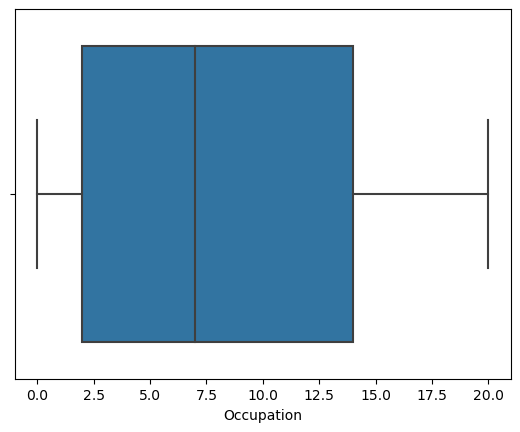

In [40]:
# Let's have a visual on outliers via boxplot

sns.boxplot(x = df["Occupation"])
plt.show()

In [41]:
# Calculating lower and uppper whiskers

lower_whisker_occ = q1_occ - 1.5 * iqr_occ
upper_whisker_occ = q3_occ + 1.5 * iqr_occ

lower_whisker_occ, upper_whisker_occ

(-16.0, 32.0)

In [42]:
# from both whisker values and boxplot 
# it can be concluded that there are no outliers in 'Occupation' column

# Data analysis

# What products are different age groups buying?

In [43]:
# let's create a heatmap to see the relation b/w age groups and product categories

In [53]:
# First, need to convert age column into categorical type

# Defining the custom order
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Converting the Age column to a categorical type with the specified order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(1), int64(5), object(4)
memory usage: 38.3+ MB


In [55]:
# creating a cross tab
cross_tab = pd.crosstab(index=df["Age"], columns=df["Product_Category"])

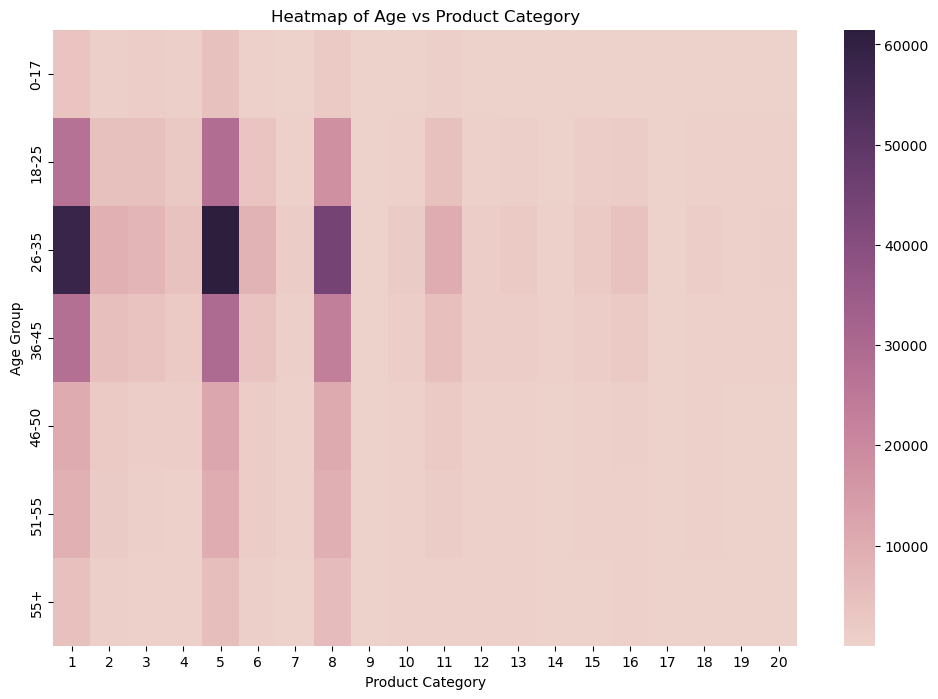

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True)

plt.title("Heatmap of Age vs Product Category")
plt.xlabel("Product Category")
plt.ylabel("Age Group")

plt.show()

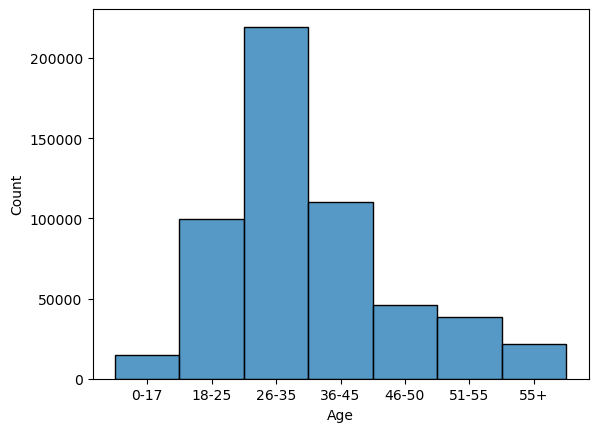

In [57]:
# creating a histplot to visualise the distribution of Age groups

sns.histplot(x=df["Age"])
plt.show()

In [58]:
# Observations:

# 1. Irrespective of the age group, the products 1, 5 and 8 are the most purchased products during the
#     black friday sale.
#     The products 1, 5 and 8 could be general houshold products, i.e., cooking or cleaning products

# 2. Major amount of the purchases are done by people of age b/w 18 and 45 years, with most purchases done by 
#     people of age group 26 to 35 years.

In [105]:
# Inference & recommendations:

# Walmart should make sure the product categories 1, 5 and 8 are definitely available 
#     in their stores and warehouses, during the Black Friday sale.

# Relationship between age, marital status, and the amount spent

In [83]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


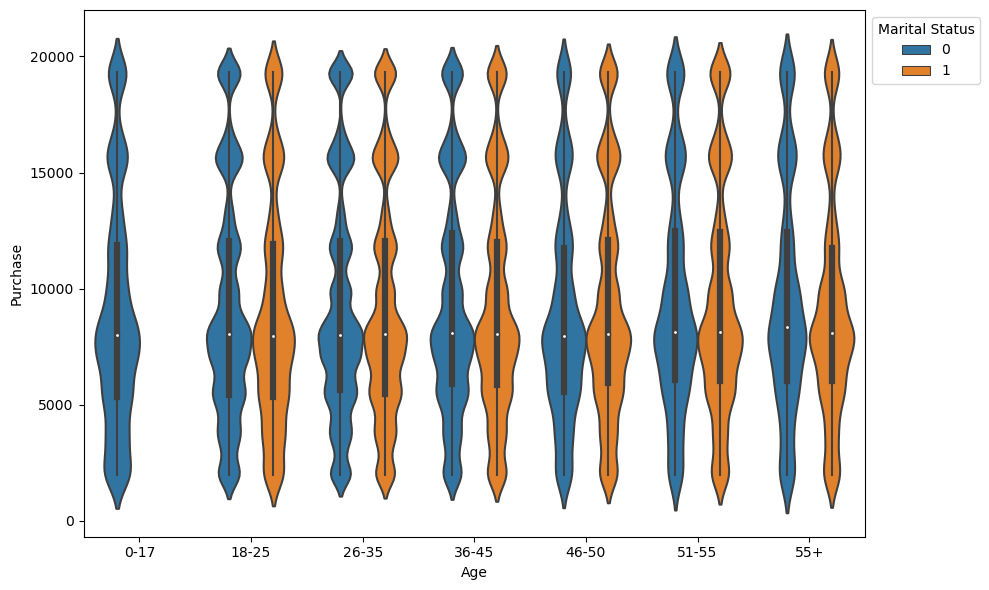

In [294]:
# Creating violinplot to compare the three parameters

plt.figure(figsize=(10,6))

sns.violinplot(data=df, x = "Age", y="Purchase", hue="Marital_Status")

plt.legend(title="Marital Status", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
# Observations:
    
# The purchase amount appears to be independent of a persons age or marital status. 
#     There is no pattern and trend b/w any of the three factors.
#     Most of the customers make the purchase around the cost of around 7000 - 8000 unints (as observed above)

In [88]:
# Inferences & recommendations:

# Walmart should ensure that the products which cost around 7000 - 8000 units
#     are readly available in abundace to the customers, during the Black Friday sale.
#     This will ensure customer satisfactions are met.

# Products categories preference for different genders

In [89]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


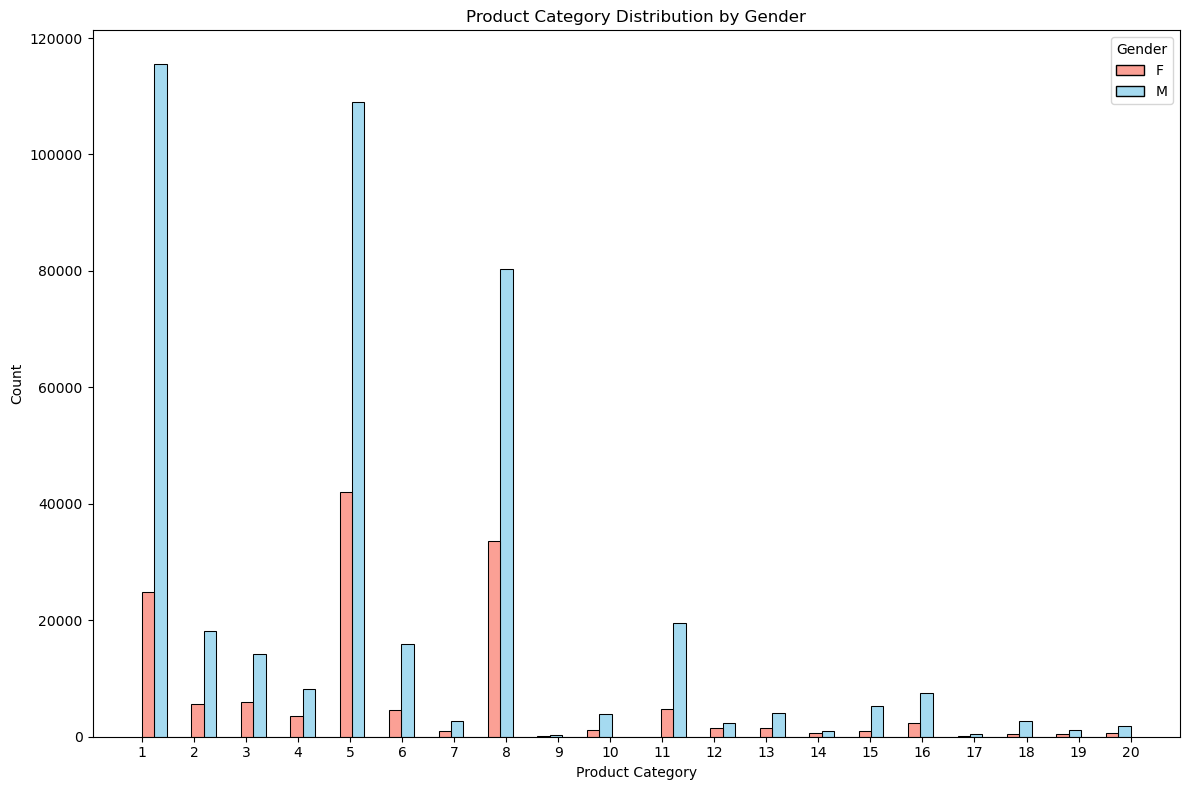

In [119]:
# Creating a histplot for for each gender with the count of products in each product category.

plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x="Product_Category",
                  hue="Gender", bins=40, 
                  palette={"M": "skyblue", "F": "salmon"}, 
                  multiple="dodge")

plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Product Category Distribution by Gender")
plt.xticks(range(1, 21), range(1, 21))

plt.tight_layout()
plt.show()

In [107]:
# Top 5 preferences of products for men

df[df["Gender"] == "M"]["Product_Category"].value_counts().to_frame()[:5]

,count
Product_Category,
1,115547
5,108972
8,80367
11,19548
2,18206


In [108]:
# Top 5 preferences of products for women

df[df["Gender"] == "F"]["Product_Category"].value_counts().to_frame()[:5]

,count
Product_Category,
5,41961
8,33558
1,24831
3,6006
2,5658


In [120]:
# Observations:

# 1. Irrespective of gender, products 1, 5 and 8 are most purchased ones among both males and females.
#     With small preferences in products 2, 3, 4, 6 and 11.

# 2. Men prefer product 1 significantly most during the sale, while women prefer product 5 significantly most.

# 3. Men spend significantly more than women during the sale, irrespective of the product category.
#     Even the most bought product by women is less then the top 3rd most bought product by men.

In [122]:
# Inferences and recommendations:

# 1. Products 1, 2, 3, 4, 5, 6, 8 and 11 should be available in abundance during the sale.

# 2. Since men spend more than women during the sale, Walmart should ensure that 
#     the products that are specific to men's usage are available more in number compared to women's products

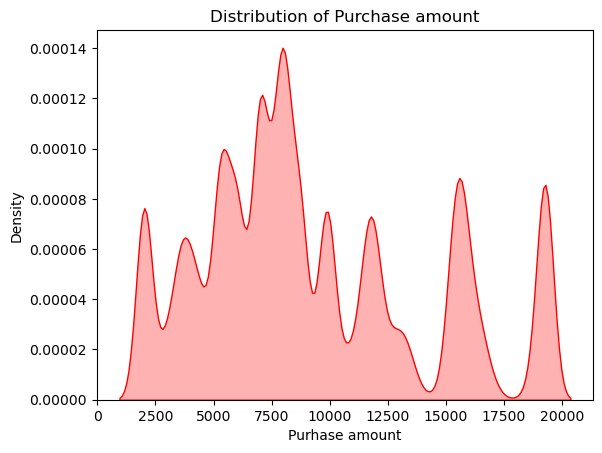

In [260]:
# Distribution pattern of the give data set for the Purchase amount.
# For future references...

sns.kdeplot(df["Purchase"], fill=True, color="red", alpha=0.3)

plt.title('Distribution of Purchase amount')
plt.xlabel('Purhase amount')
plt.ylabel('Density')
plt.show()

# Affect of gender on the amount spent

In [123]:
# data set

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [124]:
df.shape

(550068, 10)

In [125]:
# extracting all the males from the data set and storing them separately for future possible use

df_male = df[df["Gender"] == "M"]

In [126]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414259 entries, 4 to 550063
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     414259 non-null  int64   
 1   Product_ID                  414259 non-null  object  
 2   Gender                      414259 non-null  object  
 3   Age                         414259 non-null  category
 4   Occupation                  414259 non-null  int64   
 5   City_Category               414259 non-null  object  
 6   Stay_In_Current_City_Years  414259 non-null  object  
 7   Marital_Status              414259 non-null  int64   
 8   Product_Category            414259 non-null  int64   
 9   Purchase                    414259 non-null  int64   
dtypes: category(1), int64(5), object(4)
memory usage: 32.0+ MB


In [127]:
# Extracting all the females from the data set and stroing them separately for future possible use

df_female = df[df["Gender"] == "F"]

In [128]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135809 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     135809 non-null  int64   
 1   Product_ID                  135809 non-null  object  
 2   Gender                      135809 non-null  object  
 3   Age                         135809 non-null  category
 4   Occupation                  135809 non-null  int64   
 5   City_Category               135809 non-null  object  
 6   Stay_In_Current_City_Years  135809 non-null  object  
 7   Marital_Status              135809 non-null  int64   
 8   Product_Category            135809 non-null  int64   
 9   Purchase                    135809 non-null  int64   
dtypes: category(1), int64(5), object(4)
memory usage: 10.5+ MB


In [130]:
# Count of customers for each gender

print(f"Males: {df_male.shape[0]}\nFemales: {df_female.shape[0]}")

Males: 414259
Females: 135809


In [131]:
# Now, I need to estimate the average spend for each gender from the data set
#     and then expand that analysis for the entire population of the Walmart customers, i.e., 100 million

# I will be using Centeral Limit Theorem (CLT) on the give data set for the requirement

## Male customers analysis

In [132]:
df_male.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


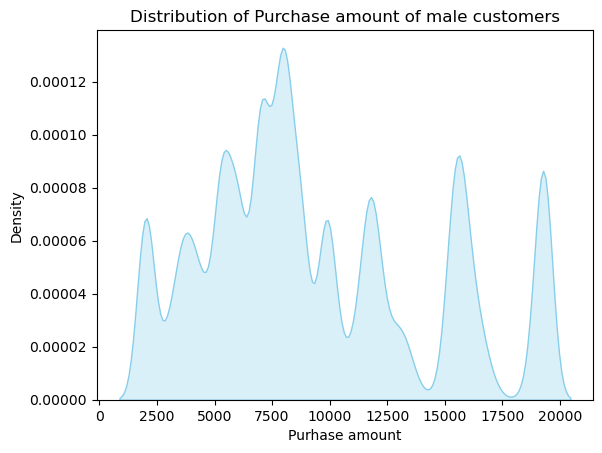

In [261]:
# Distribution pattern of the give data set for the Purchase amount of male customers.
# For future references...

sns.kdeplot(df_male["Purchase"], fill=True, color="skyblue", alpha=0.3)

plt.title('Distribution of Purchase amount of male customers')
plt.xlabel('Purhase amount')
plt.ylabel('Density')
plt.show()

In [133]:
# the current data set is sample w.r.t. the actual total no. of Walmart male customers
# I am aming to estimate the entire male population mean µ from the sample dataset.
# Let's begin

In [138]:
n_male = df_male.shape[0]  # sample size
x_bar_male = df_male["Purchase"].mean()  # sample mean
sigma_male = df_male["Purchase"].std()  # standard deviation
se_male = sigma_male/np.sqrt(n_male)  # standard error

print(f"{n_male = }\n{x_bar_male = }\n{sigma_male = }\n{se_male = }")

n_male = 414259
x_bar_male = 9427.240996574606
sigma_male = 4925.9534922859
se_male = 7.653398570985602


In [140]:
# Computing population mean of males, with 95% confidence interval 

mu_males = norm.interval(0.95, loc=x_bar_male, scale=se_male)
mu_males

(9412.240611016145, 9442.241382133068)

### Analysing the same with different sample sizes

### n = 100

In [158]:
# extracting a random sample of 100 data points.

df_male_100 = df_male.sample(n=100)
df_male_100

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
497000,1004491,P00143342,M,18-25,4,C,3,0,1,15525
324035,1001880,P00236942,M,36-45,0,B,3,1,12,1984
64228,1003841,P00117042,M,46-50,18,A,4+,0,1,11915
246875,1002000,P00293242,M,18-25,4,C,1,0,8,7802
218729,1003727,P00329242,M,36-45,7,B,1,0,5,5323
...,...,...,...,...,...,...,...,...,...,...
17403,1002748,P00241642,M,26-35,4,B,1,0,1,15848
351112,1000053,P0096742,M,26-35,0,B,1,0,2,15929
497897,1004640,P00129342,M,26-35,4,B,0,1,1,3928
472334,1000791,P00102342,M,36-45,7,B,1,0,8,6110


In [159]:
n_male_100 = df_male_100.shape[0]  # sample size
x_bar_male_100 = df_male_100["Purchase"].mean()  # sample mean
sigma_male_100 = df_male_100["Purchase"].std()  # standard deviation
se_male_100 = sigma_male_100/np.sqrt(n_male_100)  # standard error

print(f"{n_male_100 = }\n{x_bar_male_100 = }\n{sigma_male_100 = }\n{se_male_100 = }")

n_male_100 = 100
x_bar_male_100 = 9344.97
sigma_male_100 = 5191.383754060105
se_male_100 = 519.1383754060105


In [160]:
# Computing population mean of males, with 95% confidence interval 

mu_males_100 = norm.interval(0.95, loc=x_bar_male_100, scale=se_male_100)
mu_males_100

(8327.477481211585, 10362.462518788414)

### n = 1,000

In [165]:
# extracting a random sample of 1,000 data points.

df_male_1000 = df_male.sample(n=1000)
df_male_1000.shape

(1000, 10)

In [166]:
n_male_1000 = df_male_1000.shape[0]  # sample size
x_bar_male_1000 = df_male_1000["Purchase"].mean()  # sample mean
sigma_male_1000 = df_male_1000["Purchase"].std()  # standard deviation
se_male_1000 = sigma_male_1000/np.sqrt(n_male_1000)  # standard error

print(f"{n_male_1000 = }\n{x_bar_male_1000 = }\n{sigma_male_1000 = }\n{se_male_1000 = }")

n_male_1000 = 1000
x_bar_male_1000 = 9393.871
sigma_male_1000 = 5022.094544906242
se_male_1000 = 158.81257386610494


In [167]:
# Computing population mean of males, with 95% confidence interval 

mu_males_1000 = norm.interval(0.95, loc=x_bar_male_1000, scale=se_male_1000)
mu_males_1000

(9082.604074930327, 9705.137925069672)

### n = 10,000

In [174]:
# extracting a random sample of 10,000 data points.

df_male_10000 = df_male.sample(n=10000)
df_male_10000.shape

(10000, 10)

In [175]:
n_male_10000 = df_male_10000.shape[0]  # sample size
x_bar_male_10000 = df_male_10000["Purchase"].mean()  # sample mean
sigma_male_10000 = df_male_10000["Purchase"].std()  # standard deviation
se_male_10000 = sigma_male_10000/np.sqrt(n_male_10000)  # standard error

print(f"{n_male_10000 = }\n{x_bar_male_10000 = }\n{sigma_male_10000 = }\n{se_male_10000 = }")

n_male_10000 = 10000
x_bar_male_10000 = 9418.2936
sigma_male_10000 = 4909.255608038901
se_male_10000 = 49.092556080389016


In [176]:
# Computing population mean of males, with 95% confidence interval

mu_males_10000 = norm.interval(0.95, loc=x_bar_male_10000, scale=se_male_10000)
mu_males_10000

(9322.073958173425, 9514.513241826577)

In [184]:
print("Confidence intervals for different sample sizes, as computed above:")
print(f"- {n_male_100} sample size:\t{mu_males_100}")
print(f"- {n_male_1000} sample size:\t{mu_males_1000}")
print(f"- {n_male_10000} sample size:\t{mu_males_10000}")
print(f"- {n_male} sample size:\t{mu_males}")

Confidence intervals for different sample sizes, as computed above:
- 100 sample size:	(8327.477481211585, 10362.462518788414)
- 1000 sample size:	(9082.604074930327, 9705.137925069672)
- 10000 sample size:	(9322.073958173425, 9514.513241826577)
- 414259 sample size:	(9412.240611016145, 9442.241382133068)


## Female customers analysis

In [185]:
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


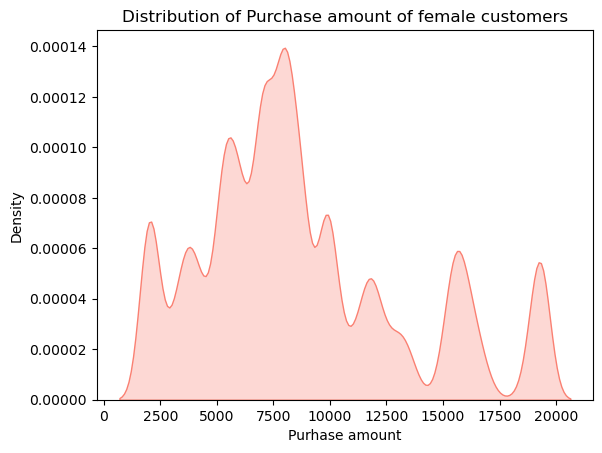

In [262]:
# Distribution pattern of the give data set for the Purchase amount of female customers.
# For future references...

sns.kdeplot(df_female["Purchase"], fill=True, color="salmon", alpha=0.3)

plt.title('Distribution of Purchase amount of female customers')
plt.xlabel('Purhase amount')
plt.ylabel('Density')
plt.show()

In [186]:
# the current data set is sample w.r.t. the actual total no. of Walmart female customers
# I am aming to estimate the entire female population mean µ from the sample dataset.
# Let's begin

In [187]:
n_female = df_female.shape[0]  # sample size
x_bar_female = df_female["Purchase"].mean()  # sample mean
sigma_female = df_female["Purchase"].std()  # standard deviation
se_female = sigma_female/np.sqrt(n_female)  # standard error

print(f"{n_female = }\n{x_bar_female = }\n{sigma_female = }\n{se_female = }")

n_female = 135809
x_bar_female = 8736.540266109021
sigma_female = 4596.984613522649
se_female = 12.474087164948696


In [188]:
# Computing population mean of females, with 95% confidence interval 

mu_females = norm.interval(0.95, loc=x_bar_female, scale=se_female)
mu_females

(8712.091504525708, 8760.989027692334)

### Analysing the same with different sample sizes

### n = 100

In [190]:
# extracting a random sample of 100 data points.

df_female_100 = df_female.sample(n=100)
df_female_100

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
279959,1001164,P00037242,F,26-35,19,A,1,1,8,9799
501961,1005329,P00193842,F,26-35,5,B,1,0,11,6053
327714,1002464,P00108542,F,18-25,4,C,4+,0,5,7193
255788,1003483,P00326742,F,46-50,7,B,0,1,11,6179
291918,1003026,P00008642,F,18-25,4,B,1,0,4,1984
...,...,...,...,...,...,...,...,...,...,...
529142,1003539,P00021642,F,26-35,4,A,1,1,8,7993
233703,1006037,P00120342,F,46-50,1,C,4+,0,5,8642
406740,1002617,P00000142,F,46-50,15,C,1,0,3,8218
92177,1002142,P00313442,F,46-50,14,C,2,1,5,7187


In [191]:
n_female_100 = df_female_100.shape[0]  # sample size
x_bar_female_100 = df_female_100["Purchase"].mean()  # sample mean
sigma_female_100 = df_female_100["Purchase"].std()  # standard deviation
se_female_100 = sigma_female_100/np.sqrt(n_female_100)  # standard error

print(f"{n_female_100 = }\n{x_bar_female_100 = }\n{sigma_female_100 = }\n{se_female_100 = }")

n_female_100 = 100
x_bar_female_100 = 9508.38
sigma_female_100 = 5073.125304897556
se_female_100 = 507.3125304897556


In [192]:
# Computing population mean of females, with 95% confidence interval 

mu_females_100 = norm.interval(0.95, loc=x_bar_female_100, scale=se_female_100)
mu_females_100

(8514.0657113342, 10502.694288665798)

### n = 1,000

In [194]:
# extracting a random sample of 1,000 data points.

df_female_1000 = df_female.sample(n=1000)
df_female_1000.shape

(1000, 10)

In [195]:
n_female_1000 = df_female_1000.shape[0]  # sample size
x_bar_female_1000 = df_female_1000["Purchase"].mean()  # sample mean
sigma_female_1000 = df_female_1000["Purchase"].std()  # standard deviation
se_female_1000 = sigma_female_1000/np.sqrt(n_female_1000)  # standard error

print(f"{n_female_1000 = }\n{x_bar_female_1000 = }\n{sigma_female_1000 = }\n{se_female_1000 = }")

n_female_1000 = 1000
x_bar_female_1000 = 8742.536
sigma_female_1000 = 4619.714698615124
se_female_1000 = 146.08820587782103


In [196]:
# Computing population mean of females, with 95% confidence interval 

mu_females_1000 = norm.interval(0.95, loc=x_bar_female_1000, scale=se_female_1000)
mu_females_1000

(8456.208377913399, 9028.863622086601)

### n = 10,000

In [198]:
# extracting a random sample of 10,000 data points.

df_female_10000 = df_female.sample(n=10000)
df_female_10000.shape

(10000, 10)

In [199]:
n_female_10000 = df_female_10000.shape[0]  # sample size
x_bar_female_10000 = df_female_10000["Purchase"].mean()  # sample mean
sigma_female_10000 = df_female_10000["Purchase"].std()  # standard deviation
se_female_10000 = sigma_female_10000/np.sqrt(n_female_10000)  # standard error

print(f"{n_female_10000 = }\n{x_bar_female_10000 = }\n{sigma_female_10000 = }\n{se_female_10000 = }")

n_female_10000 = 10000
x_bar_female_10000 = 8716.5572
sigma_female_10000 = 4593.435971484808
se_female_10000 = 45.93435971484808


In [200]:
# Computing population mean of females, with 95% confidence interval

mu_females_10000 = norm.interval(0.95, loc=x_bar_female_10000, scale=se_female_10000)
mu_females_10000

(8626.52750930599, 8806.586890694009)

In [208]:
# Finding confidence interval of male for a sample size equal to that of given female sample size, i.e., n_female
# For better comparison...

df_male_extra = df_male.sample(n=n_female)
df_male_extra.shape

(135809, 10)

In [209]:
n_male_extra = df_male_extra.shape[0]  # sample size
x_bar_male_extra = df_male_extra["Purchase"].mean()  # sample mean
sigma_male_extra = df_male_extra["Purchase"].std()  # standard deviation
se_male_extra = sigma_male_extra/np.sqrt(n_male_extra)  # standard error

print(f"{n_male_extra = }\n{x_bar_male_extra = }\n{sigma_male_extra = }\n{se_male_extra = }")

n_male_extra = 135809
x_bar_male_extra = 9431.995839745525
sigma_male_extra = 4934.226995823635
se_male_extra = 13.389206797971308


In [210]:
# Computing population mean of males, with 95% confidence interval

mu_males_extra = norm.interval(0.95, loc=x_bar_male_extra, scale=se_male_extra)
mu_males_extra

(9405.753476639942, 9458.238202851107)

In [212]:
print("Confidence intervals for different sample sizes, along with range of interval:: Males:")
print(f"- {n_male_100} sample size:\t{mu_males_100}\t:: {mu_males_100[-1] - mu_males_100[0]}")
print(f"- {n_male_1000} sample size:\t{mu_males_1000}\t:: {mu_males_1000[-1] - mu_males_1000[0]}")
print(f"- {n_male_10000} sample size:\t{mu_males_10000}\t:: {mu_males_10000[-1] - mu_males_10000[0]}")
print(f"- {n_male_extra} sample size:\t{mu_males_extra}\t:: {mu_males_extra[-1] - mu_males_extra[0]}")
print(f"- {n_male} sample size:\t{mu_males}\t:: {mu_males[-1] - mu_males[0]}")

print()

print("Confidence intervals for different sample sizes, along with range of interval:: Females:")
print(f"- {n_female_100} sample size:\t{mu_females_100}\t:: {mu_females_100[-1] - mu_females_100[0]}")
print(f"- {n_female_1000} sample size:\t{mu_females_1000}\t:: {mu_females_1000[-1] - mu_females_1000[0]}")
print(f"- {n_female_10000} sample size:\t{mu_females_10000}\t:: {mu_females_10000[-1] - mu_females_10000[0]}")
print(f"- {n_female} sample size:\t{mu_females}\t:: {mu_females[-1] - mu_females[0]}")

Confidence intervals for different sample sizes, along with range of interval:: Males:
- 100 sample size:	(8327.477481211585, 10362.462518788414)	:: 2034.9850375768292
- 1000 sample size:	(9082.604074930327, 9705.137925069672)	:: 622.5338501393453
- 10000 sample size:	(9322.073958173425, 9514.513241826577)	:: 192.4392836531515
- 135809 sample size:	(9405.753476639942, 9458.238202851107)	:: 52.48472621116525
- 414259 sample size:	(9412.240611016145, 9442.241382133068)	:: 30.000771116923715

Confidence intervals for different sample sizes, along with range of interval:: Females:
- 100 sample size:	(8514.0657113342, 10502.694288665798)	:: 1988.6285773315976
- 1000 sample size:	(8456.208377913399, 9028.863622086601)	:: 572.6552441732019
- 10000 sample size:	(8626.52750930599, 8806.586890694009)	:: 180.05938138801866
- 135809 sample size:	(8712.091504525708, 8760.989027692334)	:: 48.89752316662634


In [213]:
# Defining a function to generate sample means
def generate_sample_means(data, sample_size, num_samples):
    sample_means = [data['Purchase'].sample(sample_size).mean() for _ in range(num_samples)]
    return sample_means

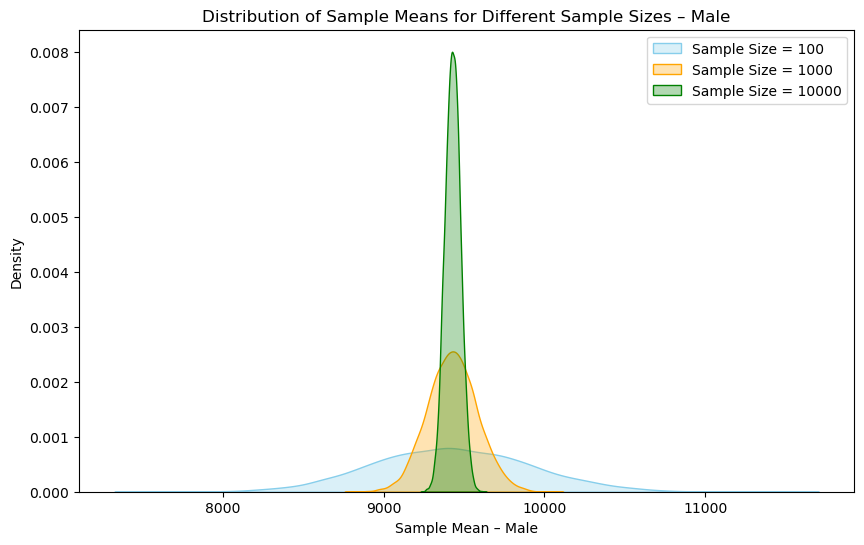

In [295]:
# For male data points

num_samples = 10000  # no. of samples
sample_sizes = [100, 1000, 10000]  # different samples sizes for comparison
colors = ['skyblue', 'orange', 'green']

# Ploting sample means for each sample size on the same graph
plt.figure(figsize=(10, 6))

for sample_size, color in zip(sample_sizes, colors):
    sample_means = generate_sample_means(df_male, sample_size, num_samples)
    
    # Ploting KDE for smoother curves
    sns.kdeplot(sample_means, label=f'Sample Size = {sample_size}', color=color, fill=True, alpha=0.3)

plt.title('Distribution of Sample Means for Different Sample Sizes – Male')
plt.xlabel('Sample Mean – Male')
plt.ylabel('Density')
plt.legend()
plt.show()

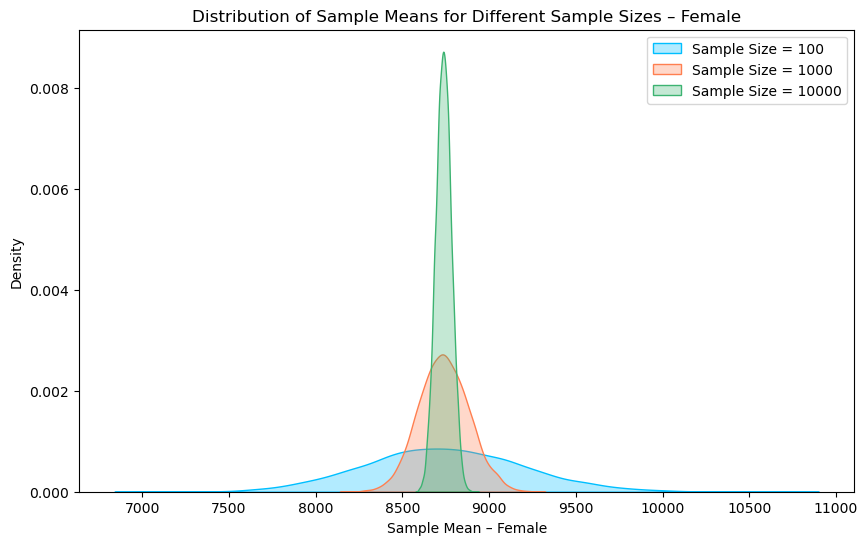

In [296]:
# For female data points

num_samples = 10000  # no. of samples
sample_sizes = [100, 1000, 10000]  # different samples sizes for comparison
colors = ['deepskyblue', 'coral', 'mediumseagreen']

# Ploting sample means for each sample size on the same graph
plt.figure(figsize=(10, 6))

for sample_size, color in zip(sample_sizes, colors):
    sample_means = generate_sample_means(df_female, sample_size, num_samples)
    
    # Ploting KDE for smoother curves
    sns.kdeplot(sample_means, label=f'Sample Size = {sample_size}', color=color, fill=True, alpha=0.3)

plt.title('Distribution of Sample Means for Different Sample Sizes – Female')
plt.xlabel('Sample Mean – Female')
plt.ylabel('Density')
plt.legend()
plt.show()

In [218]:
# Observations & Inferences:

# 1. The confidence interval of 95% is smaller for males compared to females, for the given data set.
#     This is due to the larger sample size of male data over female data.
#     male_sample_data > female_sample_data

# 2. When the sample data size is equal for both the genders (n = 100, 1000, 10000 and 1358009)
#     The confidence intervals for females is smaller than of males.
#     CI_female < CI_male
#     This is due to the fact that the standard deviation (σ) of male data points for purchase amount is more than 
#         that of the standard deviation (σ) of female data points for purchase amount.
#     More σ means more variability in the data set, hence increasing the confidence interval of estimation of
#         population mean (µ) , i.e., reducing the confidence in estimating the range of µ.
#     As seen from above analysis, irrespective of the sample size, the sample σ is more in male data set 
#         than the sample σ of female data set, hence, supporting my conclusion.

# 3. Irrespective of the gender, as the sample size increases, the confidence interval reduces in the range.
#     This is expected, as more the sample data points, the sample mean will resemble the population mean 
#     more closely.
#     Thus, during sample statistics, it is recommended to have an adequate amount of sample size
#         for good estimation of population statistics, recommended value is n_sample ≥ 30.
        
# 4. In both gender, confindence intervals overlap for different sample sizes.
#     This signifies that the sample means may not be statistically different from each other. 
#     Each of the intervals probably contains the true population mean (µ).
    
# 5. From the sample mean distributions for both male and female data points, as plotted above,
#     - irrespective of the distribution of original data set, distribution of sample mean will follow
#         a normal distribution curve, as long as sample size ≥ 30, as can be seen for n = 100, 1000 & 10000.
#         This verifies the Centeral Limit Theorem (CLT).
#     - As the sample size increases (100 -> 1000 -> 10000), the bell curve gets narrower
#         Thus improving our estimation of population mean -> reducing the range of confidence interval.
#         Hence, greater the sample size, more true will be the sample mean to the population mean.

# Affect of Marital_Status on amount spent

In [219]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(1), int64(5), object(4)
memory usage: 38.3+ MB


In [220]:
df["Marital_Status"].unique()

array([0, 1])

In [221]:
# Assuming:
#     0 -> single
#     1 -> married

In [223]:
# Separating single and married data points into different dataframe objects

df_single = df[df["Marital_Status"] == 0]
df_married = df[df["Marital_Status"] == 1]

In [229]:
# No. of data points in each of the above dataframes for single and married categories

print(f"Single: {df_single.shape[0]}\nMarried: {df_married.shape[0]}")

Single: 324731
Married: 225337


In [230]:
# Now, I need to estimate the average spend for each gender from the data set
#     and then expand that analysis for the entire population of the Walmart customers, i.e., 100 million

# I will be using Centeral Limit Theorem (CLT) on the give data set for the requirement

## Single customers analysis

In [231]:
df_single.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


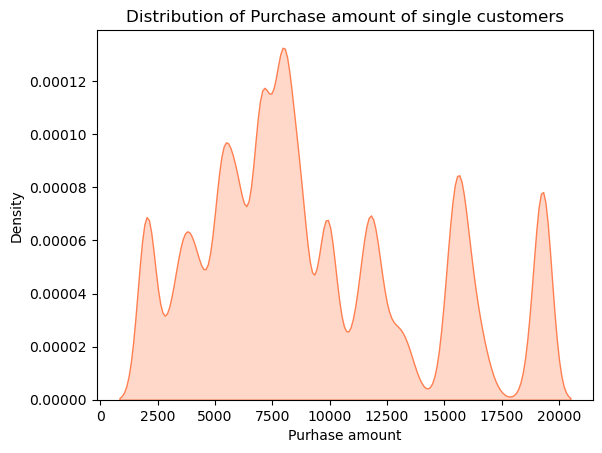

In [265]:
# Distribution pattern of the give data set for the Purchase amount of single customers.
# For future references...

sns.kdeplot(df_single["Purchase"], fill=True, color="coral", alpha=0.3)

plt.title('Distribution of Purchase amount of single customers')
plt.xlabel('Purhase amount')
plt.ylabel('Density')
plt.show()

In [133]:
# the current data set is sample w.r.t. the actual total no. of Walmart male customers
# I am aming to estimate the entire single customers' population mean µ from the sample dataset.
# Let's begin

In [232]:
n_single = df_single.shape[0]  # sample size
x_bar_single = df_single["Purchase"].mean()  # sample mean
sigma_single = df_single["Purchase"].std()  # standard deviation
se_single = sigma_single/np.sqrt(n_single)  # standard error

print(f"{n_single = }\n{x_bar_single = }\n{sigma_single = }\n{se_single = }")

n_single = 324731
x_bar_single = 9258.820463706883
sigma_single = 4864.581471475336
se_single = 8.536573939878094


In [233]:
# Computing population mean of all the single customers, with 95% confidence interval 

mu_single = norm.interval(0.95, loc=x_bar_single, scale=se_single)
mu_single

(9242.089086233358, 9275.551841180408)

### Analysing the same with different sample sizes

### n = 100

In [234]:
# extracting a random sample of 100 data points.

df_single_100 = df_single.sample(n=100)
df_single_100

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
128086,1001712,P00270942,M,26-35,0,B,4+,0,1,15361
188303,1005068,P00205142,M,36-45,7,C,2,0,8,7982
318503,1001117,P00171542,M,18-25,14,B,3,0,2,9739
151357,1005388,P00330342,F,18-25,4,C,1,0,5,3689
503582,1005575,P00025442,M,36-45,7,C,2,0,1,19336
...,...,...,...,...,...,...,...,...,...,...
117144,1000053,P00368442,M,26-35,0,B,1,0,11,7513
428096,1005912,P00084442,M,26-35,1,C,2,0,13,1984
142008,1003901,P00254242,M,18-25,14,C,0,0,5,5163
225725,1004783,P00028042,M,26-35,0,A,4+,0,1,15645


In [235]:
n_single_100 = df_single_100.shape[0]  # sample size
x_bar_single_100 = df_single_100["Purchase"].mean()  # sample mean
sigma_single_100 = df_single_100["Purchase"].std()  # standard deviation
se_single_100 = sigma_single_100/np.sqrt(n_single_100)  # standard error

print(f"{n_single_100 = }\n{x_bar_single_100 = }\n{sigma_single_100 = }\n{se_single_100 = }")

n_single_100 = 100
x_bar_single_100 = 8776.36
sigma_single_100 = 4630.498045774255
se_single_100 = 463.0498045774255


In [236]:
# Computing population mean of singles, with 95% confidence interval

mu_single_100 = norm.interval(0.95, loc=x_bar_single_100, scale=se_single_100)
mu_single_100

(7868.799059979936, 9683.920940020065)

### n = 1,000

In [237]:
# extracting a random sample of 1,000 data points.

df_single_1000 = df_single.sample(n=1000)
df_single_1000.shape

(1000, 10)

In [238]:
n_single_1000 = df_single_1000.shape[0]  # sample size
x_bar_single_1000 = df_single_1000["Purchase"].mean()  # sample mean
sigma_single_1000 = df_single_1000["Purchase"].std()  # standard deviation
se_single_1000 = sigma_single_1000/np.sqrt(n_single_1000)  # standard error

print(f"{n_single_1000 = }\n{x_bar_single_1000 = }\n{sigma_single_1000 = }\n{se_single_1000 = }")

n_single_1000 = 1000
x_bar_single_1000 = 8995.251
sigma_single_1000 = 4932.865816659133
se_single_1000 = 155.99091372629425


In [239]:
# Computing population mean of singles, with 95% confidence interval 

mu_single_1000 = norm.interval(0.95, loc=x_bar_single_1000, scale=se_single_1000)
mu_single_1000

(8689.51442718097, 9300.98757281903)

### n = 10,000

In [240]:
# extracting a random sample of 10,000 data points.

df_single_10000 = df_single.sample(n=10000)
df_single_10000.shape

(10000, 10)

In [241]:
n_single_10000 = df_single_10000.shape[0]  # sample size
x_bar_single_10000 = df_single_10000["Purchase"].mean()  # sample mean
sigma_single_10000 = df_single_10000["Purchase"].std()  # standard deviation
se_single_10000 = sigma_single_10000/np.sqrt(n_single_10000)  # standard error

print(f"{n_single_10000 = }\n{x_bar_single_10000 = }\n{sigma_single_10000 = }\n{se_single_10000 = }")

n_single_10000 = 10000
x_bar_single_10000 = 9233.0982
sigma_single_10000 = 4869.19174725996
se_single_10000 = 48.6919174725996


In [242]:
# Computing population mean of singles, with 95% confidence interval

mu_single_10000 = norm.interval(0.95, loc=x_bar_single_10000, scale=se_single_10000)
mu_single_10000

(9137.663795415509, 9328.532604584492)

## Married customers analysis

In [243]:
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


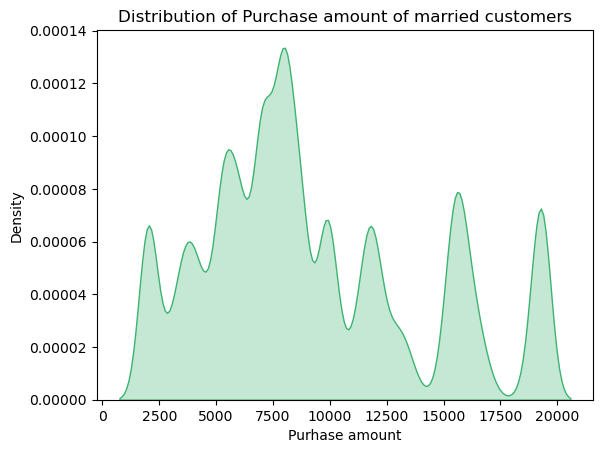

In [266]:
# Distribution pattern of the give data set for the Purchase amount of married customers.
# For future references...

sns.kdeplot(df_married["Purchase"], fill=True, color="mediumseagreen", alpha=0.3)

plt.title('Distribution of Purchase amount of married customers')
plt.xlabel('Purhase amount')
plt.ylabel('Density')
plt.show()

In [186]:
# the current data set is sample w.r.t. the actual total no. of Walmart married customers
# I am aming to estimate the entire married customer population mean µ from the sample dataset.
# Let's begin

In [244]:
n_married = df_married.shape[0]  # sample size
x_bar_married = df_married["Purchase"].mean()  # sample mean
sigma_married = df_married["Purchase"].std()  # standard deviation
se_married = sigma_married/np.sqrt(n_married)  # standard error

print(f"{n_married = }\n{x_bar_married = }\n{sigma_married = }\n{se_married = }")

n_married = 225337
x_bar_married = 9253.669823420034
sigma_married = 4843.48644692002
se_married = 10.203327692592387


In [245]:
# Computing population mean of married customers, with 95% confidence interval 

mu_married = norm.interval(0.95, loc=x_bar_married, scale=se_married)
mu_married

(9233.671668620093, 9273.667978219975)

### Analysing the same with different sample sizes

### n = 100

In [246]:
# extracting a random sample of 100 data points.

df_married_100 = df_married.sample(n=100)
df_married_100.shape

(100, 10)

In [247]:
n_married_100 = df_married_100.shape[0]  # sample size
x_bar_married_100 = df_married_100["Purchase"].mean()  # sample mean
sigma_married_100 = df_married_100["Purchase"].std()  # standard deviation
se_married_100 = sigma_married_100/np.sqrt(n_married_100)  # standard error

print(f"{n_married_100 = }\n{x_bar_married_100 = }\n{sigma_married_100 = }\n{se_married_100 = }")

n_married_100 = 100
x_bar_married_100 = 9446.14
sigma_married_100 = 5211.439228148676
se_married_100 = 521.1439228148677


In [248]:
# Computing population mean of married customers, with 95% confidence interval 

mu_married_100 = norm.interval(0.95, loc=x_bar_married_100, scale=se_married_100)
mu_married_100

(8424.716680520936, 10467.563319479063)

### n = 1,000

In [249]:
# extracting a random sample of 1,000 data points.

df_married_1000 = df_married.sample(n=1000)
df_married_1000.shape

(1000, 10)

In [250]:
n_married_1000 = df_married_1000.shape[0]  # sample size
x_bar_married_1000 = df_married_1000["Purchase"].mean()  # sample mean
sigma_married_1000 = df_married_1000["Purchase"].std()  # standard deviation
se_married_1000 = sigma_married_1000/np.sqrt(n_married_1000)  # standard error

print(f"{n_married_1000 = }\n{x_bar_married_1000 = }\n{sigma_married_1000 = }\n{se_married_1000 = }")

n_married_1000 = 1000
x_bar_married_1000 = 9124.724
sigma_married_1000 = 4838.178987153716
se_married_1000 = 152.9966532697227


In [251]:
# Computing population mean of married customers, with 95% confidence interval 

mu_married_1000 = norm.interval(0.95, loc=x_bar_married_1000, scale=se_married_1000)
mu_married_1000

(8824.856069836182, 9424.591930163819)

### n = 10,000

In [252]:
# extracting a random sample of 10,000 data points.

df_married_10000 = df_married.sample(n=10000)
df_married_10000.shape

(10000, 10)

In [253]:
n_married_10000 = df_married_10000.shape[0]  # sample size
x_bar_married_10000 = df_married_10000["Purchase"].mean()  # sample mean
sigma_married_10000 = df_married_10000["Purchase"].std()  # standard deviation
se_married_10000 = sigma_married_10000/np.sqrt(n_married_10000)  # standard error

print(f"{n_married_10000 = }\n{x_bar_married_10000 = }\n{sigma_married_10000 = }\n{se_married_10000 = }")

n_married_10000 = 10000
x_bar_married_10000 = 9251.0172
sigma_married_10000 = 4840.634306488477
se_married_10000 = 48.406343064884766


In [254]:
# Computing population mean of married customers, with 95% confidence interval

mu_married_10000 = norm.interval(0.95, loc=x_bar_married_10000, scale=se_married_10000)
mu_married_10000

(9156.142510969536, 9345.891889030465)

In [255]:
print("Confidence intervals for different sample sizes, along with range of interval:: Singles:")
print(f"- {n_single_100} sample size:\t{mu_single_100}\t:: {mu_single_100[-1] - mu_single_100[0]}")
print(f"- {n_single_1000} sample size:\t{mu_single_1000}\t:: {mu_single_1000[-1] - mu_single_1000[0]}")
print(f"- {n_single_10000} sample size:\t{mu_single_10000}\t:: {mu_single_10000[-1] - mu_single_10000[0]}")
print(f"- {n_single} sample size:\t{mu_single}\t:: {mu_single[-1] - mu_single[0]}")

print()

print("Confidence intervals for different sample sizes, along with range of interval:: Married:")
print(f"- {n_married_100} sample size:\t{mu_married_100}\t:: {mu_married_100[-1] - mu_married_100[0]}")
print(f"- {n_married_1000} sample size:\t{mu_married_1000}\t:: {mu_married_1000[-1] - mu_married_1000[0]}")
print(f"- {n_married_10000} sample size:\t{mu_married_10000}\t:: {mu_married_10000[-1] - mu_married_10000[0]}")
print(f"- {n_married} sample size:\t{mu_married}\t:: {mu_married[-1] - mu_married[0]}")

Confidence intervals for different sample sizes, along with range of interval:: Singles:
- 100 sample size:	(7868.799059979936, 9683.920940020065)	:: 1815.1218800401293
- 1000 sample size:	(8689.51442718097, 9300.98757281903)	:: 611.4731456380614
- 10000 sample size:	(9137.663795415509, 9328.532604584492)	:: 190.86880916898372
- 324731 sample size:	(9242.089086233358, 9275.551841180408)	:: 33.46275494704969

Confidence intervals for different sample sizes, along with range of interval:: Married:
- 100 sample size:	(8424.716680520936, 10467.563319479063)	:: 2042.8466389581263
- 1000 sample size:	(8824.856069836182, 9424.591930163819)	:: 599.735860327637
- 10000 sample size:	(9156.142510969536, 9345.891889030465)	:: 189.7493780609293
- 225337 sample size:	(9233.671668620093, 9273.667978219975)	:: 39.99630959988281


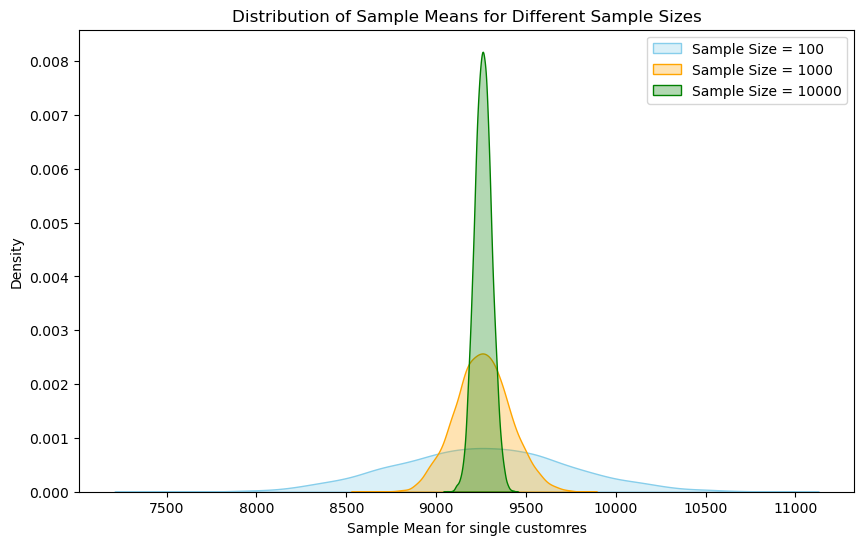

In [256]:
# For single data points

num_samples = 10000  # no. of samples
sample_sizes = [100, 1000, 10000]  # different samples sizes for comparison
colors = ['skyblue', 'orange', 'green']

# Ploting sample means for each sample size on the same graph
plt.figure(figsize=(10, 6))

for sample_size, color in zip(sample_sizes, colors):
    sample_means = generate_sample_means(df_single, sample_size, num_samples)
    
    # Ploting KDE for smoother curves
    sns.kdeplot(sample_means, label=f'Sample Size = {sample_size}', color=color, fill=True, alpha=0.3)

plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.xlabel('Sample Mean for single customres')
plt.ylabel('Density')
plt.legend()
plt.show()

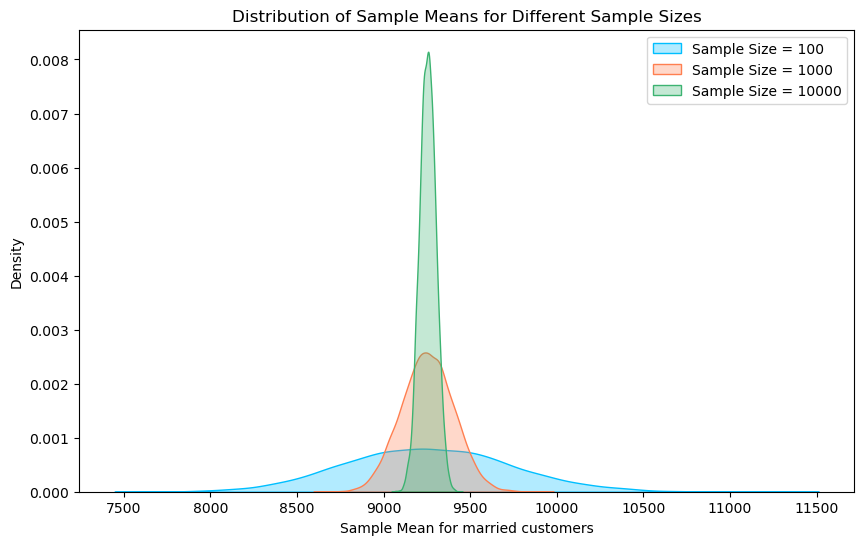

In [257]:
# For married data points

num_samples = 10000  # no. of samples
sample_sizes = [100, 1000, 10000]  # different samples sizes for comparison
colors = ['deepskyblue', 'coral', 'mediumseagreen']

# Ploting sample means for each sample size on the same graph
plt.figure(figsize=(10, 6))

for sample_size, color in zip(sample_sizes, colors):
    sample_means = generate_sample_means(df_married, sample_size, num_samples)
    
    # Ploting KDE for smoother curves
    sns.kdeplot(sample_means, label=f'Sample Size = {sample_size}', color=color, fill=True, alpha=0.3)

plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.xlabel('Sample Mean for married customers')
plt.ylabel('Density')
plt.legend()
plt.show()

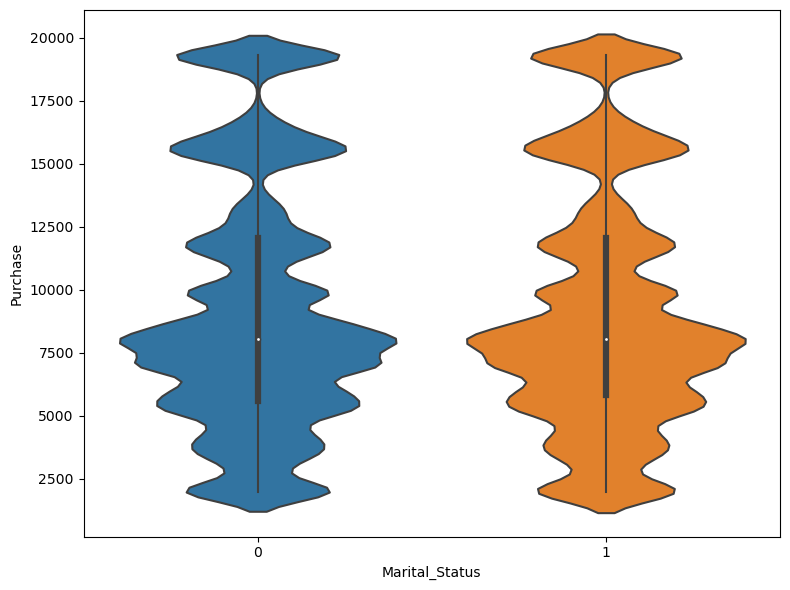

In [289]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df, y="Purchase", x="Marital_Status")

plt.tight_layout()
plt.show()

In [269]:
# Observations & Inferences:

# 1. The confidence interval of 95% is approximately same for the give data set of single and married customers,
#     for corresponding sample sizes.
#     This is because the purchase pattern is same irrespective of martial status of the customers.
#         as can be seen from the violinplot above.

# 2. Irrespective of the marital status, as the sample size increases, the confidence interval reduces in the range.
#     This is expected, as more the sample data points, the sample mean will resemble the population mean 
#     more closely.
#     Thus, during sample statistics, it is recommended to have an adequate amount of sample size
#         for good estimation of population statistics, recommended value is n_sample ≥ 30.
        
# 3. In both type of marital staus, confindence intervals overlap for different sample sizes.
#     This signifies that the sample means may not be statistically different from each other. 
#     Each of the intervals probably contains the true population mean (µ).
    
# 4. From the sample mean distributions curves for both single and married data points, as plotted above,
#     - irrespective of the distribution of original data set, distribution of sample mean will follow
#         a normal distribution curve, as long as sample size ≥ 30, as can be seen for n = 100, 1000 & 10000.
#         This verifies the Centeral Limit Theorem (CLT).
#     - As the sample size increases (100 -> 1000 -> 10000), the bell curve gets narrower
#         Thus improving our estimation of population mean -> reducing the range of confidence interval.
#         Hence, greater the sample size, more true will be the sample mean to the population mean.

# Affect of Age on amount spent

In [270]:
# since age column is categorical with ages present in the form of bins, 
# I need to take a different approach for this analysis

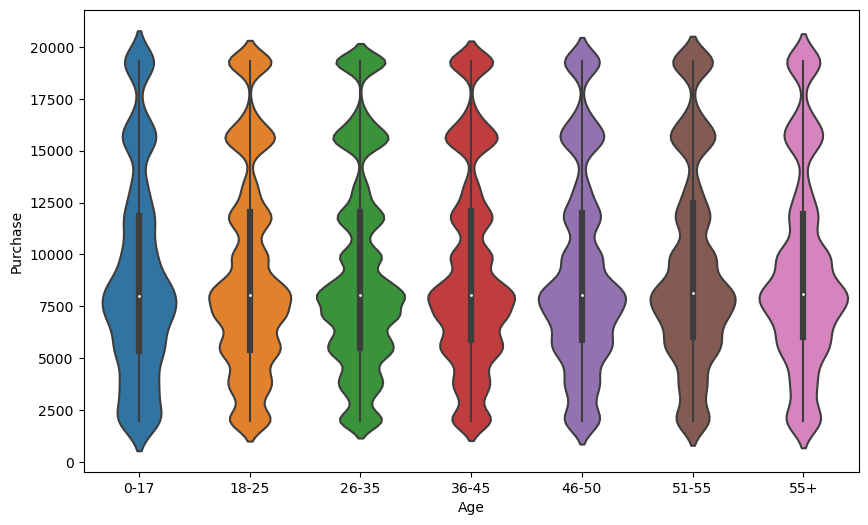

In [283]:
# Ploting violinplot of the purchase amount for each Age category

plt.figure(figsize=(10,6))

sns.violinplot(data=df, x="Age", y="Purchase")
plt.show()

In [290]:
# Observations
    
# 1. Irrespective of the age group, the purchase amount pattern is same.

# 2. People tend more towards the products which cost around 7500 units, with other prefernces of products
#     at amount of around 2500, 5000, 12000, 16000 and 19000 units.

In [291]:
# Inferences:
    
# 1. Age has no effect on the purchase pattern of the customers during the black friday sale.

# 2. Walmart should ensure the products with above highlighted purchase amounts are readly available 
#     during the sale, for high customer satisfcatiion, as these are most in demand products.

In [297]:
# Recommendations:
    
# 1. Since male spend more than female during the sale.
#     Walmart should ensure male specific products are available more in number than female specific products,
#     to meet the higher demand of male customers.
#     Ensure better customer satisfaction.

# 2. With estimated population mean spend for both male and female customers, Walmart can estimate the profit 
#     it can make during the sale period and make more reliable business decisions.
    
# 3. By focusing on the demand of specific products during the sale, Walmart can control the warehouse costs
#     of different product categories, minimise the inventroy cost on those products 
#     which are less in demand and maximise the overall profit.